## Богданов Рустем

Импортируем библиотеки

In [17]:
import random
import chardet
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Задача:

С использованием Python, посчитать среднедневные продажи за последние 30 дней, когда товарный остаток > 0.

Считаем файлы

In [2]:
# сразу преобразуем дату в тип datetime
df_stock = pd.read_csv("Stock.csv", sep=';', parse_dates=['date']) 
df_sales = pd.read_csv("Sales.csv", sep=';', parse_dates=['date'])

Содержание файлов:
* файл Stock.csv содержит остаток товара на складе и дату оценки остатка на складе
* файл Sales.csv содержит продажи товара за день в штуках и дату продажи товара

*Выведим данные:*

In [3]:
df_stock.head()

,FreeQty,date
0,700,2020-12-15
1,4837,2021-02-17
2,5092,2021-02-25
3,19592,2021-04-05
4,1002,2021-01-19


In [4]:
df_sales.head()

,date,Qty_Sold
0,2020-12-30,11
1,2021-01-15,20
2,2021-03-15,31
3,2020-12-02,85
4,2021-01-03,8


In [5]:
# Объединим данных по дате
merged_df = pd.merge(df_stock, df_sales, how='outer', on='date')

# Отфильтруем данные за последние 30 дней и когда товарный остаток > 0

# первый вариант - последние 30 дней в зависимости от текущей даты
# filter_df = merged_df[(merged_df['date'] >= (pd.to_datetime('today') - pd.DateOffset(30))) & (merged_df['FreeQty'] > 0)]

# но так как таких данных не будет, возьмем в зависимости от максимальной даты в датафрейме 
filter_df = merged_df[(merged_df['date'] >= (pd.to_datetime(merged_df['date'].max()) - pd.DateOffset(30))) & (merged_df['FreeQty'] > 0)]

print(f"Среднедневные продажи за последние 30 дней, когда товарный остаток > 0: {round(filter_df['Qty_Sold'].sum() / 30)}")


Среднедневные продажи за последние 30 дней, когда товарный остаток > 0: 51


**Вывод:** за последние 30 дней в день в среднем продавался 51 товар.

### Задача:

1. Посчитать коэффициенты сезонности товарной группы для каждого месяца, результат вывести в виде сводной таблицы
2. Определить типы сезонности (например, выраженная/умеренная сезонность и т.д.), описать критерии группировки товаров по каждому из этих типов
3. Разбить категории товаров по типу сезонности, вывести категории товаров, относящиеся к каждому из типов по отдельности
4. Вывести графики сезонных коэффициентов в зависимости от месяца для 5 товарных групп внутри каждого типа сезонности

Считаем данные

In [11]:
# в этом файле нестандартная кодировка, поэтому узнаем её 
with open("Seasonality.csv", 'rb') as f:
    result = chardet.detect(f.read())
 
df_season = pd.read_csv("Seasonality.csv", sep=';', encoding=result['encoding']) 

Содержание файлов:
* файл Seasonality.csv содержит название категории товаров и продажи в штуках за день за 2019 год

*Выведим данные:*

In [12]:
df_season.head()

,date,Qty_Sold,Cat_Name
0,28.06.2019,280,Аксесуары для рыбалки
1,02.07.2019,64,Ягоды свежие
2,28.07.2019,167,Домашняя одежда женская
3,18.09.2019,49,Галантерея мужская
4,01.06.2019,209,Уход за животными


#### 1. Посчитать коэффициенты сезонности товарной группы для каждого месяца, результат вывести в виде сводной таблицы

In [13]:
# Преобразуем столбец с датой в формат datetime и добавим столбуц с месяцем
df_season['date'] = pd.to_datetime(df_season['date'], format='%d.%m.%Y')
df_season['month'] = df_season['date'].dt.month

# Подсчитаем суммы продаж в зависиомти от категории и месяца
df_season_coef = df_season.groupby(['Cat_Name', 'month'])['Qty_Sold'].sum().reset_index()

# Подсчитаем суммы продаж для каждой категории
total_sales = df_season_coef.groupby('Cat_Name')['Qty_Sold'].sum()

# Расчитаем коэффициентов сезонности(продажи по месяцам / общие продажи для каждой категории)
df_season_coef['season'] = df_season_coef.apply(lambda x: x['Qty_Sold'] / total_sales[x['Cat_Name']], axis=1)

# Формируем сводную таблицу
pivot_table = pd.pivot_table(df_season_coef, values='season', index='Cat_Name', columns='month', fill_value=0)

pivot_table.head()


month,1,2,3,4,5,6,7,8,9,10,11,12
Cat_Name,,,,,,,,,,,,
3D Blu-ray,0.076617,0.156988,0.157871,0.103555,0.060941,0.069773,0.076397,0.052329,0.053213,0.073968,0.059837,0.058512
Audio CD,0.067991,0.156149,0.085686,0.083919,0.076434,0.081976,0.073885,0.074765,0.078462,0.090256,0.054380,0.076096
Audio MC (кассета),0.083333,0.097222,0.166667,0.055556,0.055556,0.027778,0.069444,0.111111,0.083333,0.125000,0.027778,0.097222
Audio/video кассеты,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Blu-ray,0.077922,0.137907,0.144425,0.099831,0.072006,0.064594,0.066503,0.058110,0.059039,0.087724,0.071456,0.060484


**Вывод:**

1. В целом, продажи различных категорий товаров имеют различные уровни сезонности в течение года. Некоторые категории могут иметь более выраженные сезонные колебания, в то время как другие остаются более стабильными.

2. Некоторые категории, такие как "Audio/video кассеты" и "Blu-ray Audio", имеют месяцы с очень высокими коэффициентами сезонности, что может быть связано с конкретными событиями или праздниками. Стоит отметить, что "Audio/video кассеты" продавались только два месяца.

3. Есть более стабльные категории, например, "CD+Blu-ray Audio" и "DVD + BLU-RAН", имеют более стабильные значения коэффициентов сезонности, что может указывать на более постоянный спрос в течение года.

4. В целом, продажи кажутся довольно динамичными, с изменчивостью в различных месяцах для одних категорий товаров и с стабильностью для других.



#### 2. Определить типы сезонности (например, выраженная/умеренная сезонность и т.д.), описать критерии группировки товаров по каждому из этих типов

Пусть будет три типа сезонности:
* Выраженная сезонность
* Умеренная сезонность
* Слабая/отсутствующая сезонность

Находить тип сезонности будем путем вычитания минимального коэффициента из макимального. Следует определить пороговые значения. Если сезонность отсутствует, то коэффициент будет равен 1 / 12 = 0.084(округлим до 0.09) - все разности меньше 0.09 будут иметь тип слабой сезонности. Тогда от 0.09 до 0.18 - умеренная сезонность, и все, что больше 0.18 - сильная сезонность.

#### 3. Разбить категории товаров по типу сезонности, вывести категории товаров, относящиеся к каждому из типов по отдельности

In [14]:
# Критерии для группировки
high_season = 0.18
middle_season = 0.09

# Определим тип сезонности для каждой категории и добавим в соответствующий список
high_season_category = []
middle_season_category = []
low_season_category = []

# пройдемся по категориям и коэффициентам сезонности
for cat_name, row in pivot_table.iterrows():
    if row.max() - row.min() > high_season:
        high_season_category.append(cat_name)
    elif row.max() - row.min() > middle_season:
        middle_season_category.append(cat_name)
    else:
        low_season_category.append(cat_name)

print(f"Категории с выраженной сезонностью в количестве {len(high_season_category)}:")
print(high_season_category)

print(f"\nКатегории с умеренной сезонностью в количестве {len(middle_season_category)}:")
print(middle_season_category)

print(f"\nКатегории с слабой/отсутствующей сезонностью в количестве {len(low_season_category)}:")
print(low_season_category)


Категории с выраженной сезонностью в количестве 300:
['Audio/video кассеты', 'Blu-ray  с дополнениями', 'Blu-ray Audio', 'LP + CD', 'LP + DVD', 'Second-hand книга', 'Super Audio CD', 'USB', 'VHS', 'Адаптер для игровой приставки TV&Audio', 'Аквааэробика', 'Аксессуар для детей', 'Аксессуар к TV и аудиотехнике TV&Audio', 'Аксессуар серебро', 'Аксессуары для кальяна', 'Аксессуары для компьютерной, офисной мебели', 'Аксессуары для мебели', 'Аксессуары для охотничьего оружия', 'Аксессуары для светильников', 'Аксессуары для шин и дисков', 'Акустическая система TV&Audio', 'Антикварное издание', 'Бадминтон', 'Барные стол, стул', 'Безрецептурные лекарственные препараты для животных', 'Белье и ЧНИ спортивные для девочки', 'Белье корректирующее женское', 'Беседка, тент, шатер для садовой мебели', 'Бижутерия', 'Бильярд', 'Блокноты с ISBN', 'Браслет золото', 'Браслет серебро', 'Брендированные автосувениры', 'Брошь золото', 'Брошь серебро', 'Ванна', 'Велохимия, велокосметика', 'Вентиляционные системы

**Вывод:** при разделении категорий на сезоны получили выборки, в которых нет аномальной длины. Подтверждаем выбранные коэффициенты и переходим к построению графиков.

#### 4. Вывести графики сезонных коэффициентов в зависимости от месяца для 5 товарных групп внутри каждого типа сезонности

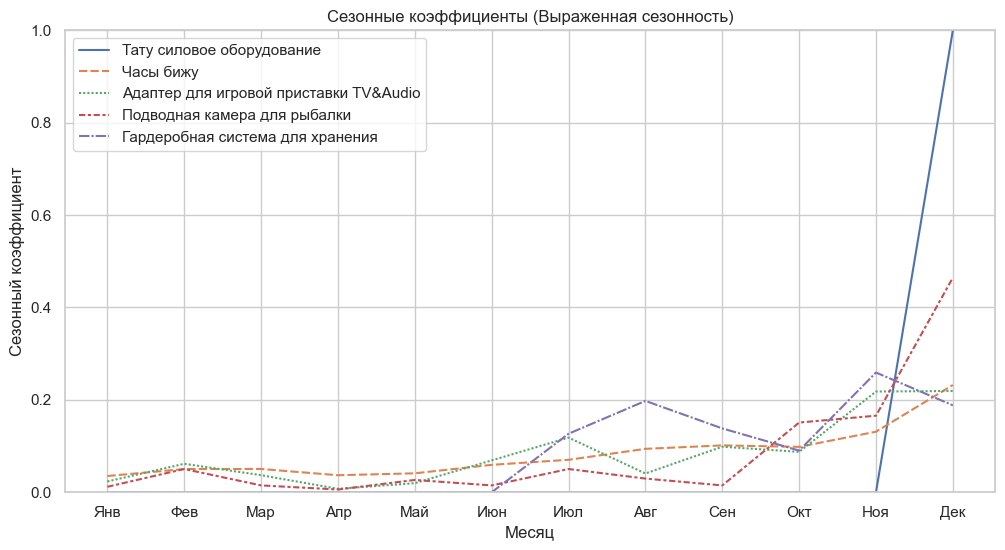

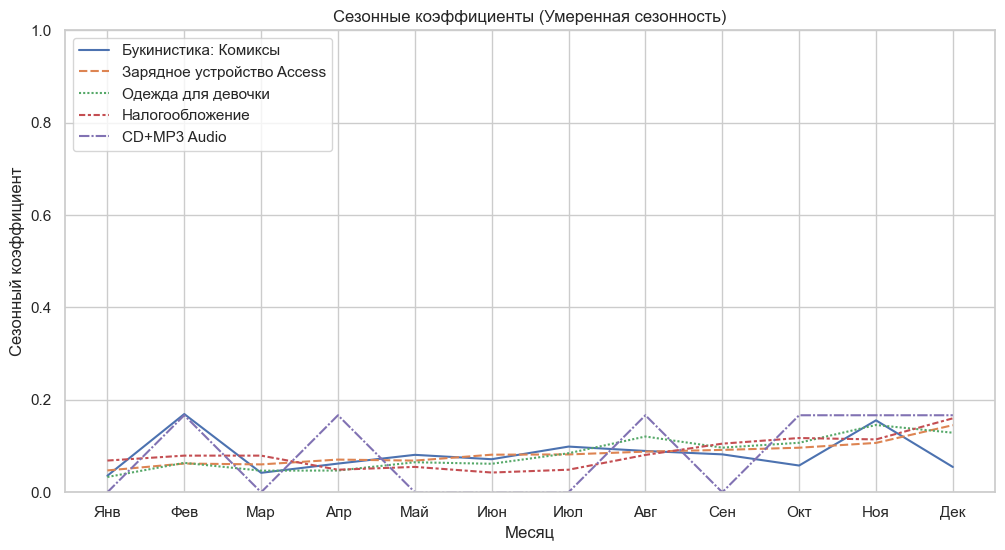

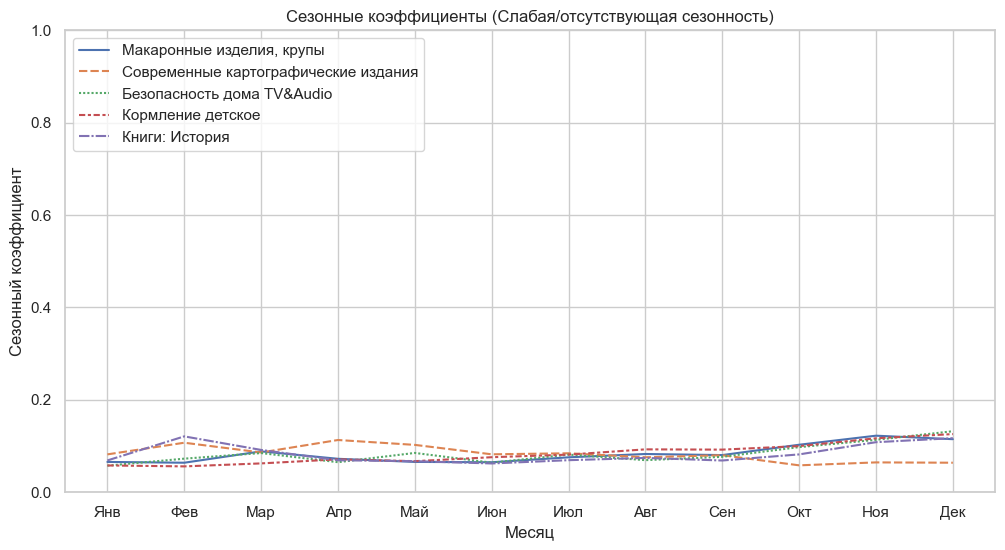

In [31]:
# Функция для создания графика сезонных коэффициентов
def plot_seasonality(pivot_table, categories, season_type):
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    sns.lineplot(data=pivot_table.loc[categories].T)
    plt.title(f"Сезонные коэффициенты ({season_type})")
    plt.xlabel("Месяц")
    plt.ylabel("Сезонный коэффициент")
    plt.ylim(0, 1) # фиксируем значения по оси y
    plt.legend(categories) # строим легенду для графиков
    plt.legend(loc='upper left')
    plt.xticks(pivot_table.columns, labels=["Янв", "Фев", "Мар", "Апр", "Май", "Июн", "Июл", "Авг", "Сен", "Окт", "Ноя", "Дек"])

    plt.show()

# выберем пять рандомных значений из списка 
# Графики для категорий с выраженной сезонностью
plot_seasonality(pivot_table, random.sample(high_season_category, 5), 'Выраженная сезонность')

# Графики для категорий с умеренной сезонностью
plot_seasonality(pivot_table, random.sample(middle_season_category, 5), 'Умеренная сезонность')

# Графики для категорий с слабой/отсутствующей сезонностью
plot_seasonality(pivot_table, random.sample(low_season_category, 5), 'Слабая/отсутствующая сезонность')


**Вывод:** построив графики еще раз можем убедиться, что некоторые товары действительно имеет свойство сезонности, распределив категории по типам, мы смогли увидеть на диаграмме зависимость сезонности от месяца. На всех графиках мы можем увидеть тендецию по увелечнгия продаж к декабрю. Скорее всего это связано с покапками подарков на новый год.